The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


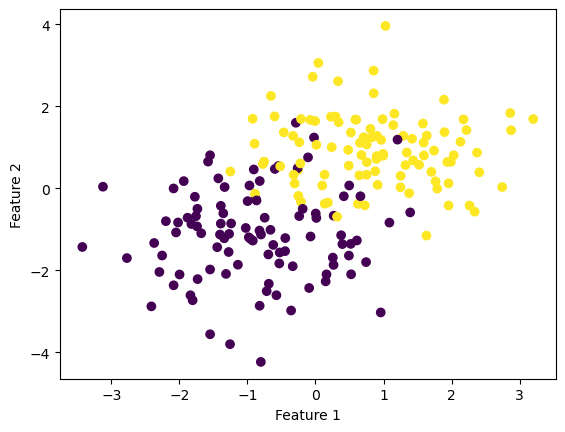

In [6]:
%load_ext autoreload
%autoreload 2

from gradient import LogisticRegression 
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import numpy as np
np.seterr(all='ignore') 

np.random.seed(123)

# make the data
p_features = 3
X, y = make_blobs(n_samples = 200, n_features = p_features - 1, centers = [(-1, -1), (1, 1)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

In [7]:
# fit the model

# np.random.seed(123)

LR = LogisticRegression()
LR.fit(X, y, alpha = 0.001, max_epochs = 10000)

# inspect the fitted value of w
LR.w 

print(LR.loss_history[-10:]) #just the last few values

Max epochs reached
[0.23992083185841037, 0.2399177901182996, 0.23991474898155554, 0.23991170844801563, 0.2399086685175172, 0.23990562918989775, 0.23990259046499482, 0.23989955234264607, 0.23989651482268903, 0.23989347790496146]


In [8]:
# add a constant feature to the feature matrix
X_ = np.append(X, np.ones((X.shape[0], 1)), 1)

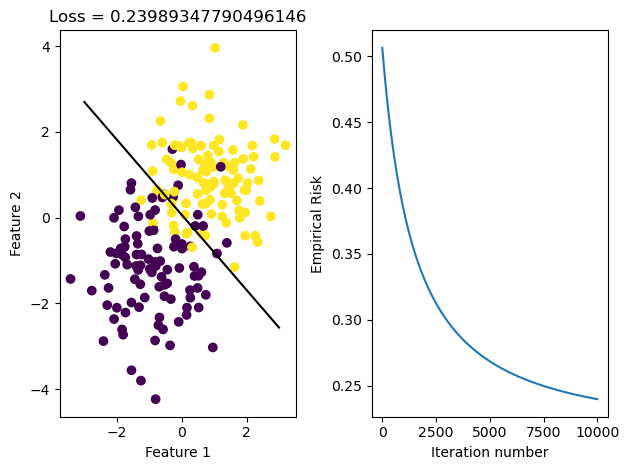

In [9]:
loss = LR.empirical_risk(X_, y)

fig, axarr = plt.subplots(1, 2)

axarr[0].scatter(X[:,0], X[:,1], c = y)
axarr[0].set(xlabel = "Feature 1", ylabel = "Feature 2", title = f"Loss = {loss}")

f1 = np.linspace(-3, 3, 101)

p = axarr[0].plot(f1, (LR.w[2] - f1*LR.w[0])/LR.w[1], color = "black")

axarr[1].plot(LR.loss_history)
axarr[1].set(xlabel = "Iteration number", ylabel = "Empirical Risk")
plt.tight_layout()